In [ ]:
!pip install quandl

In [ ]:
!pip install --upgrade pip

In [ ]:

!pip install pandas_datareader

In [ ]:
!pip install jupyter_contrib_nbextensions

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [11]:
#Extract data for share price of Facebook for a period of 7 years

start = datetime.datetime(2012,1,1)
end = datetime.datetime(2018,1,1)

facebook = web.DataReader("FB",'quandl',start,end,access_key= 'XWq2933x7YJEv_XpzmJU')
facebook.head()

<ipython-input-11-188bc18b4e30>:6: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead.
  facebook = web.DataReader("FB",'quandl',start,end,access_key= 'XWq2933x7YJEv_XpzmJU')


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.00,178.8500,176.46,176.46,10028758.0
2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.95,178.9367,177.68,177.92,11008996.0
2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.55,178.4400,176.26,177.62,9296258.0
2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.63,177.0000,174.67,175.99,8726829.0
2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.14,177.5300,176.23,177.20,8462491.0


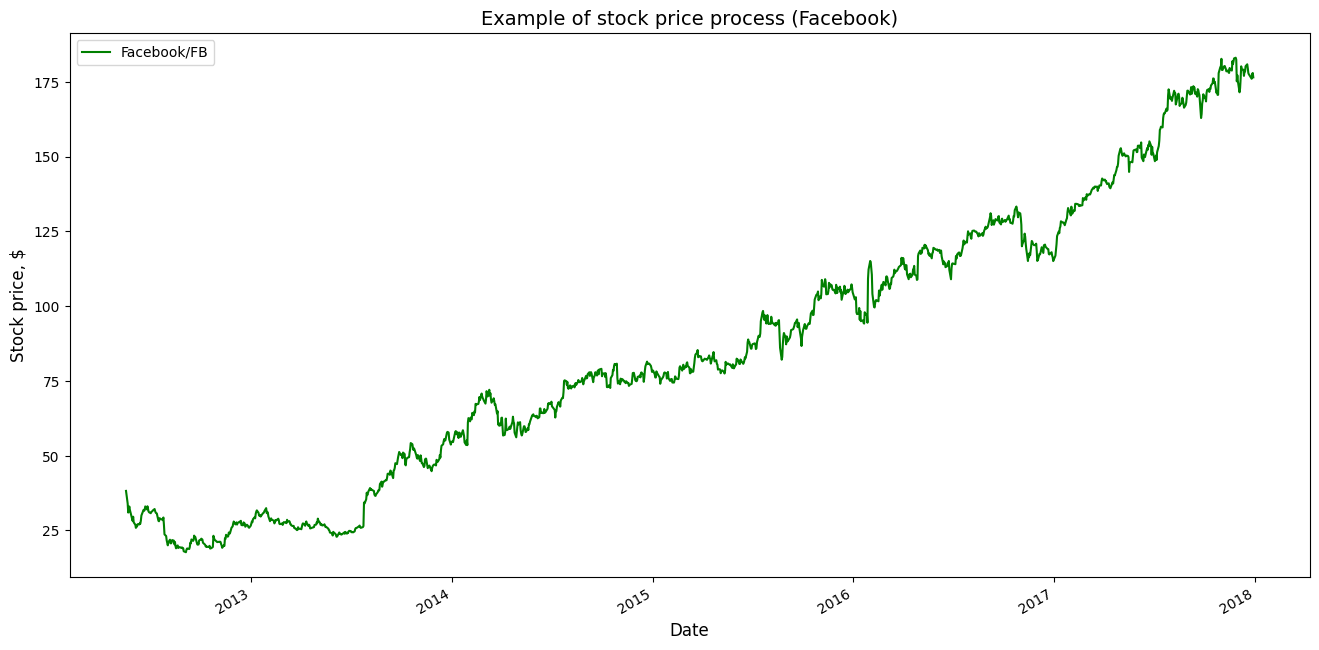

In [12]:
#visualize the data

facebook['AdjClose'].plot(label = 'Facebook/FB' , figsize = (16,8) , color = "g")
plt.title('Example of stock price process (Facebook)', fontsize = 14)
plt.xlabel('Date' , fontsize = 12)
plt.ylabel('Stock price, $', fontsize = 12)
plt.legend(loc = 'upper left')
plt.show()

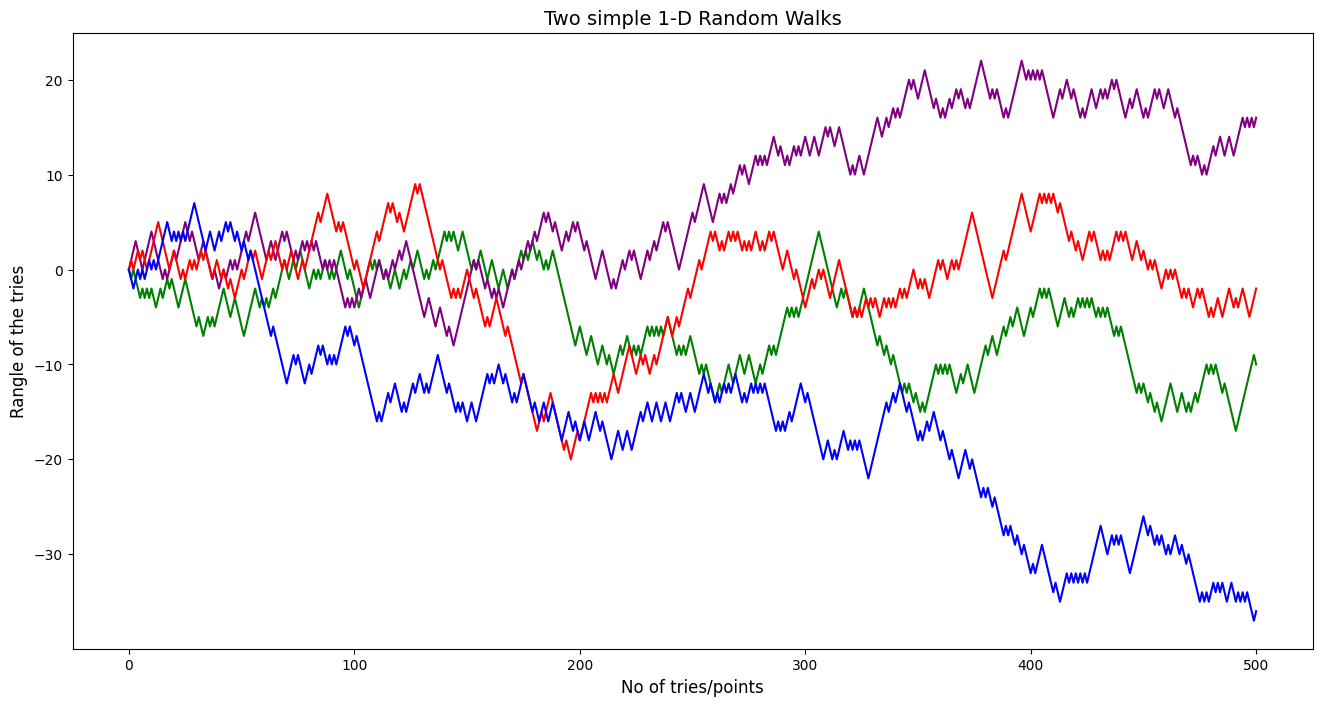

In [15]:
#We will visualize two simple 1D random walks where "the walker" can move either "up or down"
#The probability to make step yp or down is equal

prob = [0.5 , 0.5]

steps = 500

#Define the random walk function with steps count and probabilities for up and down

def SimpleRandomWalk(N, p1, p2, color):

    start = 0
    positions = [start]

    #creating random points between 0 and 1 / the steps
    rand_p = np.random.random(steps)

    #creating lists of steps for both directions
    down_p = rand_p < prob[0]
    up_p = rand_p > prob[1]

    for down, up in zip(down_p,up_p): #the random walk process
        if down == 1 and up == 0:
          movement = -1
        elif down == 0 and up == 1:
          movement = 1
        positions.append(positions[-1] + movement) #[-1] takes the last element,

    plt.plot(positions,color)
    plt.title('Few simple 1-D Random Walks' , fontsize = 14)
    plt.xlabel('No of tries/points', fontsize = 12)
    plt.ylabel('Rangle of the tries', fontsize = 12)

    return None


plt.figure(figsize = (16,8))

SimpleRandomWalk(steps,prob[0],prob[1],color = "green")
SimpleRandomWalk(steps,prob[0],prob[1],color = "purple")
SimpleRandomWalk(steps,prob[0],prob[1],color = "red")
SimpleRandomWalk(steps,prob[0],prob[1],color = "blue")

plt.show()

In [16]:
T = 1 #time interval
N = 250

seed = 20
dt = T / N
t = np.arange(0.0,1.0,dt)

def BrownianMotion(seed,N):

    np.random.seed(seed)
    Z = np.random.randn(N) #random variables
    Z[0] = 0

    dW = np.sqrt(dt) * Z  #single Brownian increment
    W = np.cumsum(dW)  #Brownian path

    return W

In mathematics, the Wiener process is a continuous-time stochastic process named in honor of Norbert Wiener5. It is often called standard Brownian motion process or Brownian motion due to its historical connection with the physical process known as Brownian motion originally observed by Robert Brown.

The Wiener process
 is characterised by the following properties:

 a.s.6
 has independent increments: for every
, the future increments
, are independent of the past walues
.
 has Gaussian increments:
 is normally distributed with mean 0 and variance
.
 has continuous paths: With probability 1,
 is continuous in
.

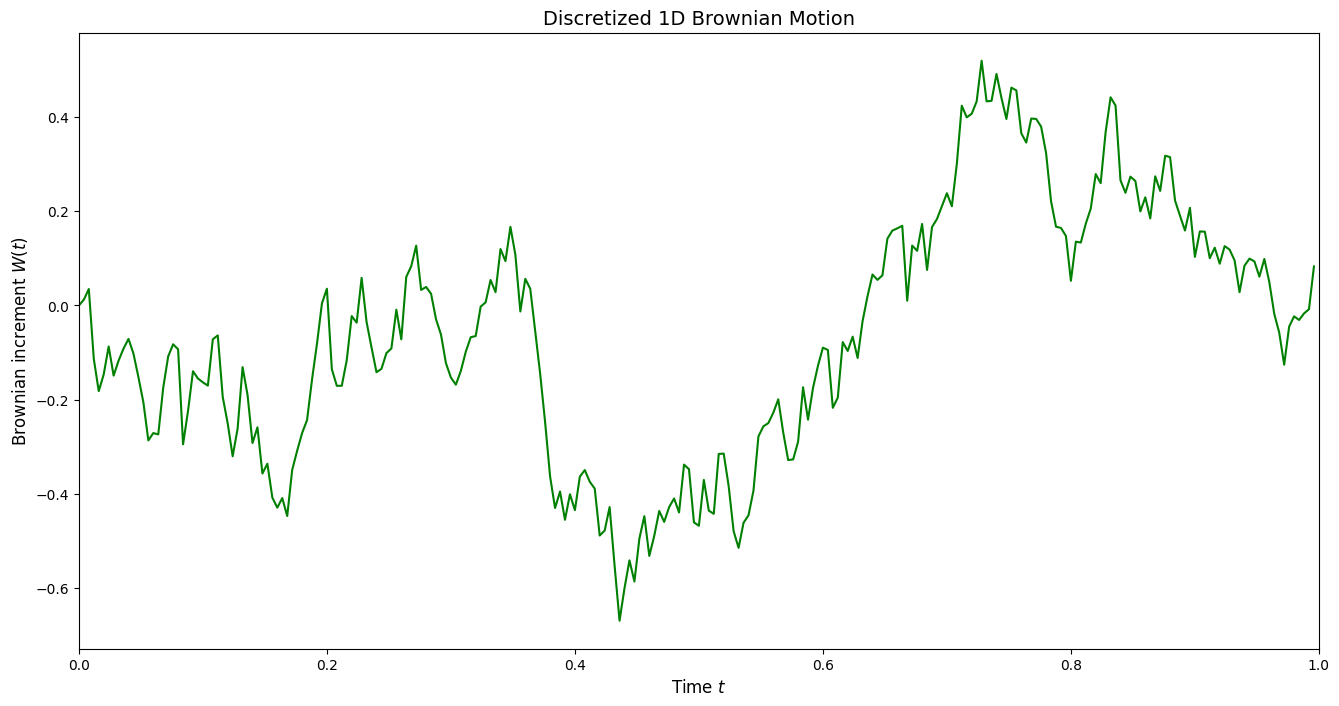

In [19]:
W = BrownianMotion(seed,N)
plt.figure(figsize = (16,8))

plt.plot(t,W,color = "green")
plt.title('Discretized 1D Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('Brownian increment $W(t)$',fontsize = 12)
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

In [26]:
#constructing GBM
#parameters:
# So - initial stock price = 56.23
#mu - the mean of returns = 0.2
# sigma - standard deviation of returns (volatility) = 0.45
# W - Brownian motion / stochastic part
# T - time horizon
# N - number of intervals

def GBM(So, mu, sigma, W, N, t):

   S = []
   S.append(So)

   for i in range(1,N):

      drift = (mu-0.5* sigma**2) * t[i]  #Calculating the deterministic part
      diffusion = sigma * W[i-1]         #Calculating the stochastic part

      S_i = So * np.exp(drift + diffusion)
      S.append(S_i)

   return S

So = 56.23
mu = 0.2
sigma = 0.6
W = BrownianMotion(seed,N)
N = 250  #assume 250 trading days for one year
T = 1.0

t = np.linspace(0. , T , N) #time increments

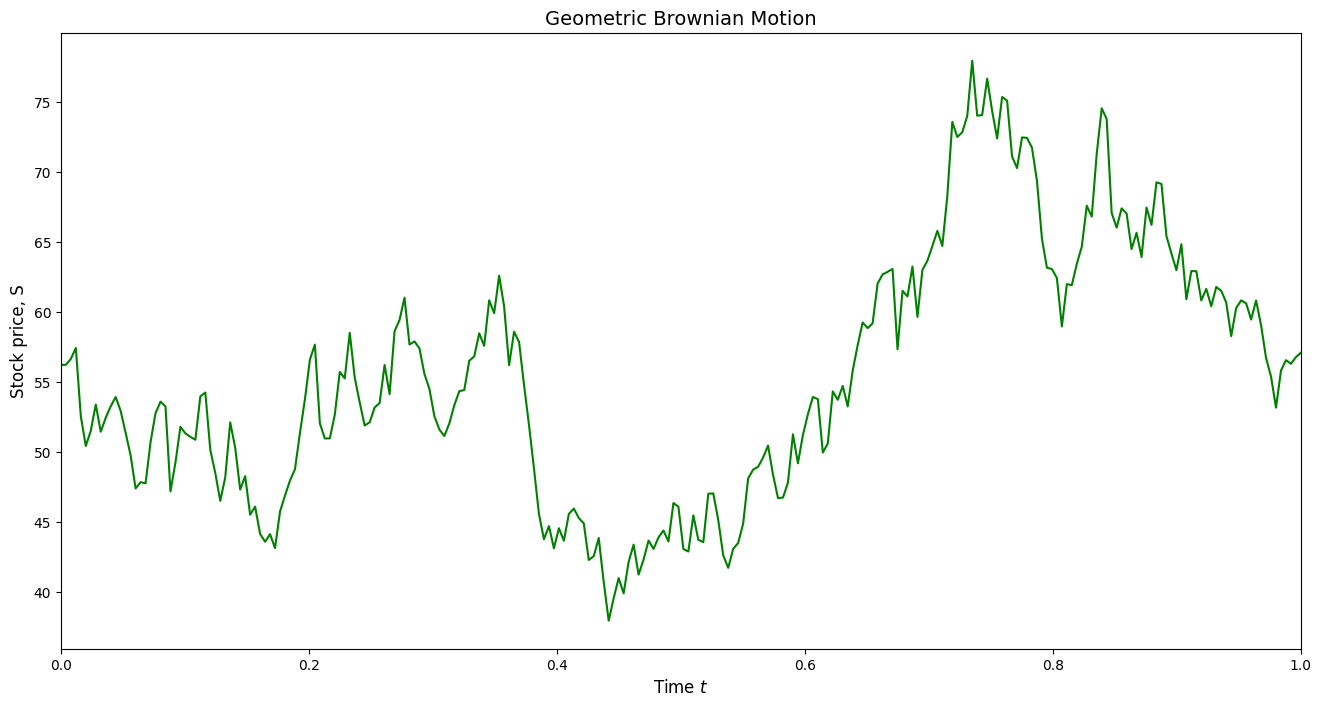

In [27]:
#plot solution

solution = GBM(So , mu, sigma, W, N, t)

plt.figure(figsize = (16,8))
plt.plot(t,solution,color = "green")

#plt.scatter(t,solution,color="black")

plt.title('Geometric Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('Stock price, S', fontsize = 12)
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

In [28]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 1)
google = web.DataReader("GOOGL", 'quandl', start, end, access_key = 'XWq2933x7YJEv_XpzmJU')
google.head()

<ipython-input-28-cbbf0668acf0>:3: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead.
  google = web.DataReader("GOOGL", 'quandl', start, end, access_key = 'XWq2933x7YJEv_XpzmJU')


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,1055.49,1058.05,1052.70,1053.40,1156357.0,0.0,1.0,1055.49,1058.05,1052.70,1053.40,1156357.0
2017-12-28,1062.25,1064.84,1053.38,1055.95,982285.0,0.0,1.0,1062.25,1064.84,1053.38,1055.95,982285.0
2017-12-27,1066.60,1068.27,1058.38,1060.20,1027634.0,0.0,1.0,1066.60,1068.27,1058.38,1060.20,1027634.0
2017-12-26,1068.64,1068.86,1058.64,1065.85,914574.0,0.0,1.0,1068.64,1068.86,1058.64,1065.85,914574.0
2017-12-22,1070.00,1071.72,1067.64,1068.86,860800.0,0.0,1.0,1070.00,1071.72,1067.64,1068.86,860800.0


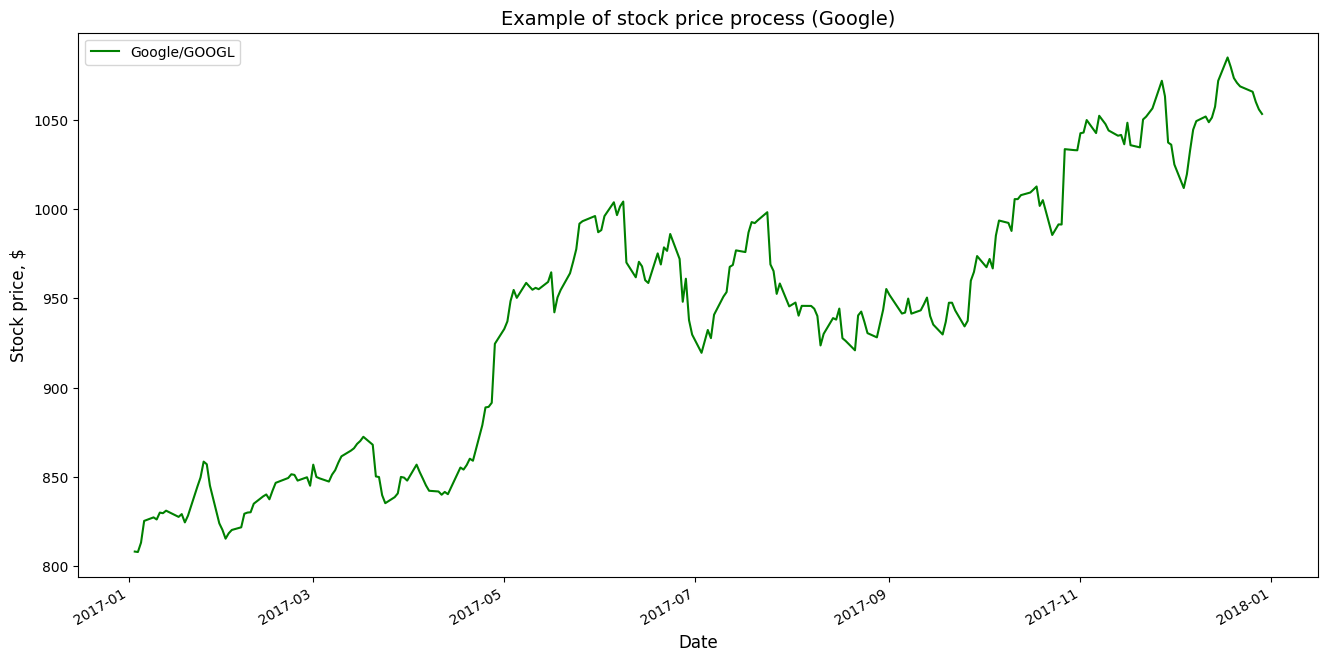

In [29]:
adj_close = google['AdjClose']
adj_close.plot(label = 'Google/GOOGL', figsize = (16,8), color = "g")
plt.title('Example of stock price process (Google)', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Stock price, $', fontsize = 12)
plt.legend(loc = 'upper left')
plt.show()

In [30]:
# Stock Return (excl. dividents) = (P1 - P0)/P0, where P0 = Initial Stock Price, P1 = Ending Stock Price (Period 1)
adj_reversed = list(reversed(adj_close))

def daily_return(adj_reversed):
    returns = []
    for i in range(0, len(adj_reversed)-1):
        today = adj_reversed[i+1]
        yesterday = adj_reversed[i]

        daily_return = (today - yesterday)/yesterday

        returns.append(daily_return)
    return returns

returns = daily_return(adj_reversed)

In [31]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 250 trading days
mu = np.mean(returns) * 250.
sig = np.std(returns)* np.sqrt(250.)

print(mu)
print(sig)

0.27781278325588427
0.1510608270308626


In [32]:
#GBM based on real stock prices

# Parameters:
# So - initial stock price
# mu - the mean of returns
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals

def GBM_Exact(So, mu, sigma, W, N, t):

    S = []
    S.append(So)

    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)

    return S


So = adj_reversed[0]
W = BrownianMotion(seed, N)
N = 250     #assume 250 trading days for one year
T = 1.0

t = np.linspace(0., T, N)    #time increments

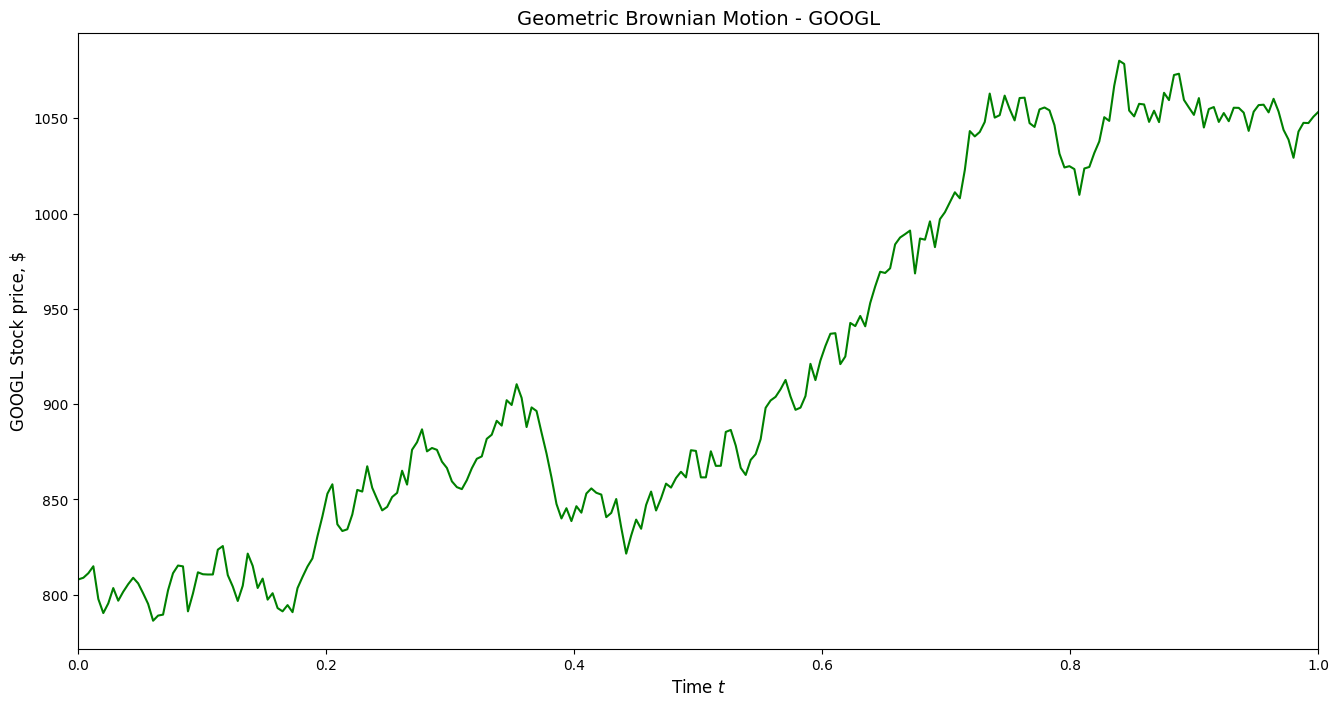

In [33]:
#plot solution

solution = GBM_Exact(So, mu, sig, W, N, t)

plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()


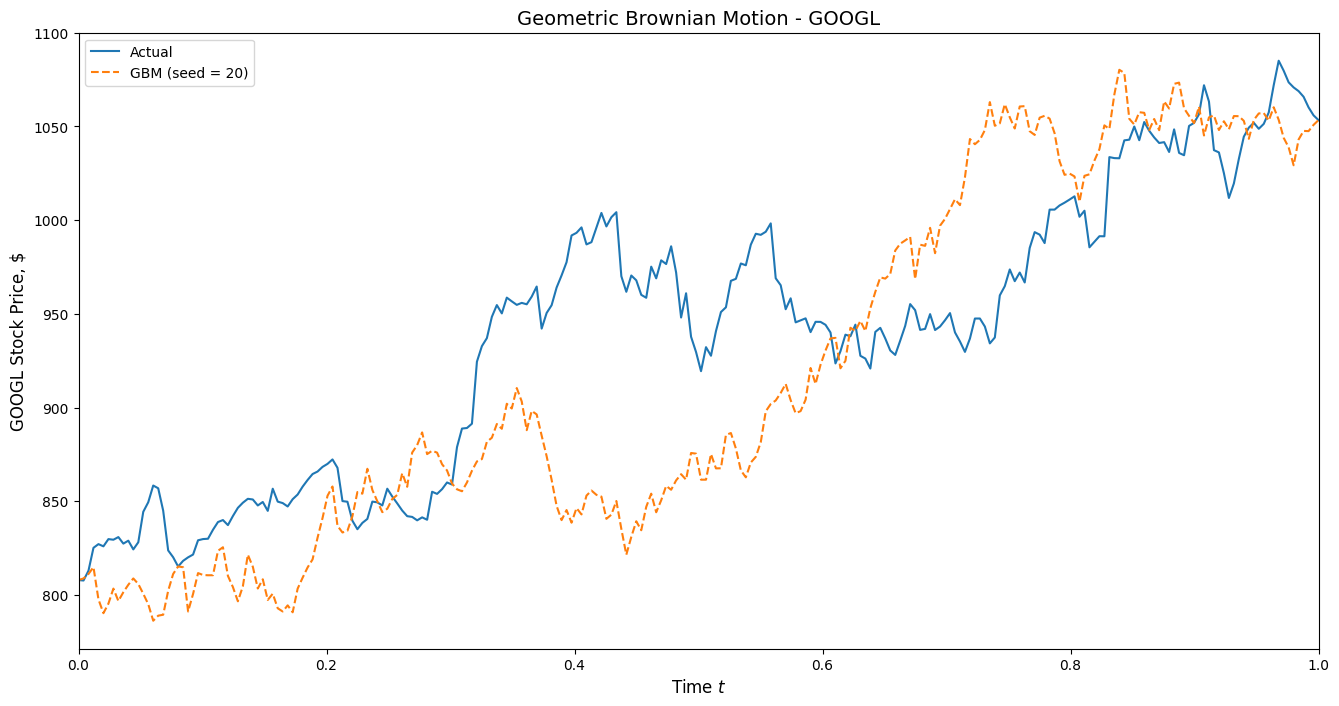

In [34]:
plt.figure(figsize = (16, 8))


plt.plot(t, adj_reversed, label = 'Actual')
plt.plot(t, solution, label = 'GBM (seed = 20)', ls='--')

plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

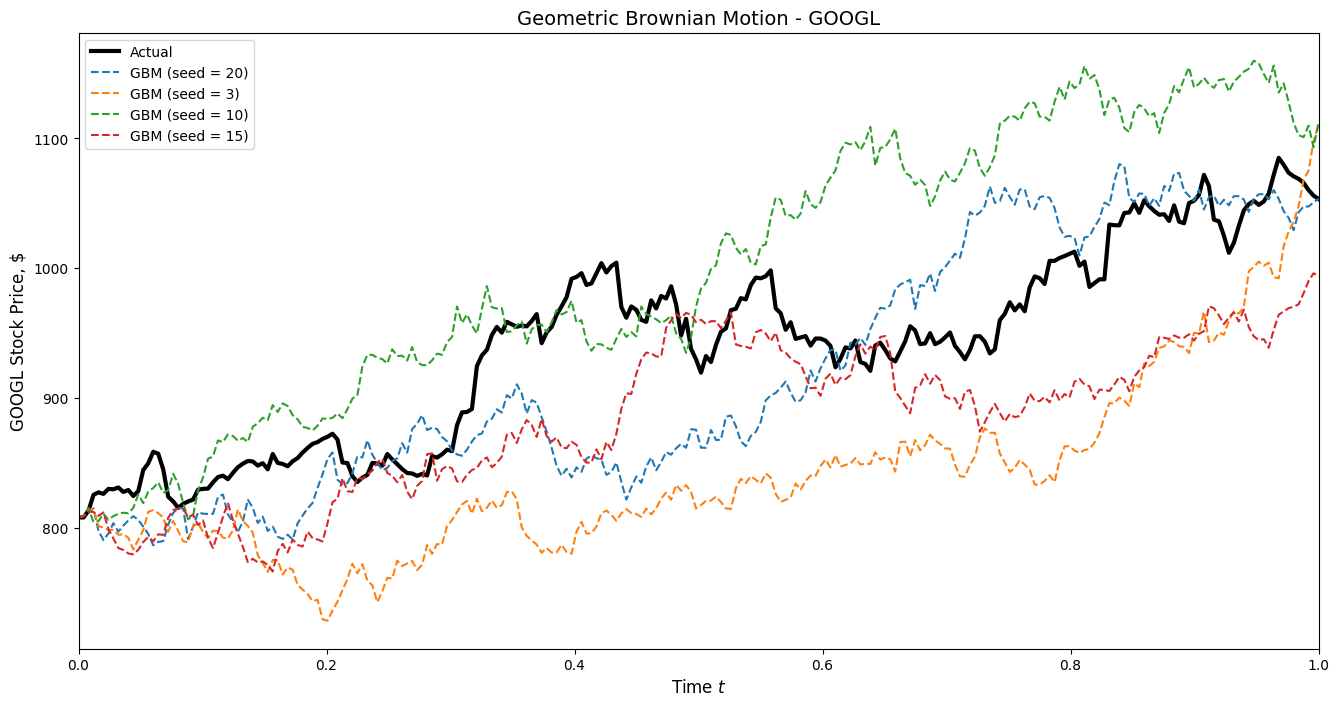

In [35]:
N =250
So = adj_reversed[0]

seed = 3
W = BrownianMotion(seed, N)
solution2 = GBM_Exact(So, mu, sig, W, N, t)

seed = 10
W = BrownianMotion(seed, N)
solution3 = GBM_Exact(So, mu, sig, W, N, t)

seed = 15
W = BrownianMotion(seed, N)
solution4 = GBM_Exact(So, mu, sig, W, N, t)


plt.figure(figsize = (16, 8))


plt.plot(t, adj_reversed, label = 'Actual', linewidth = 3, color = "black")
plt.plot(t, solution, label = 'GBM (seed = 20)', ls='--')
plt.plot(t, solution2, label = 'GBM (seed = 3)', ls='--')
plt.plot(t, solution3, label = 'GBM (seed = 10)', ls='--')
plt.plot(t, solution4, label = 'GBM (seed = 15)', ls='--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,1.])
plt.show()

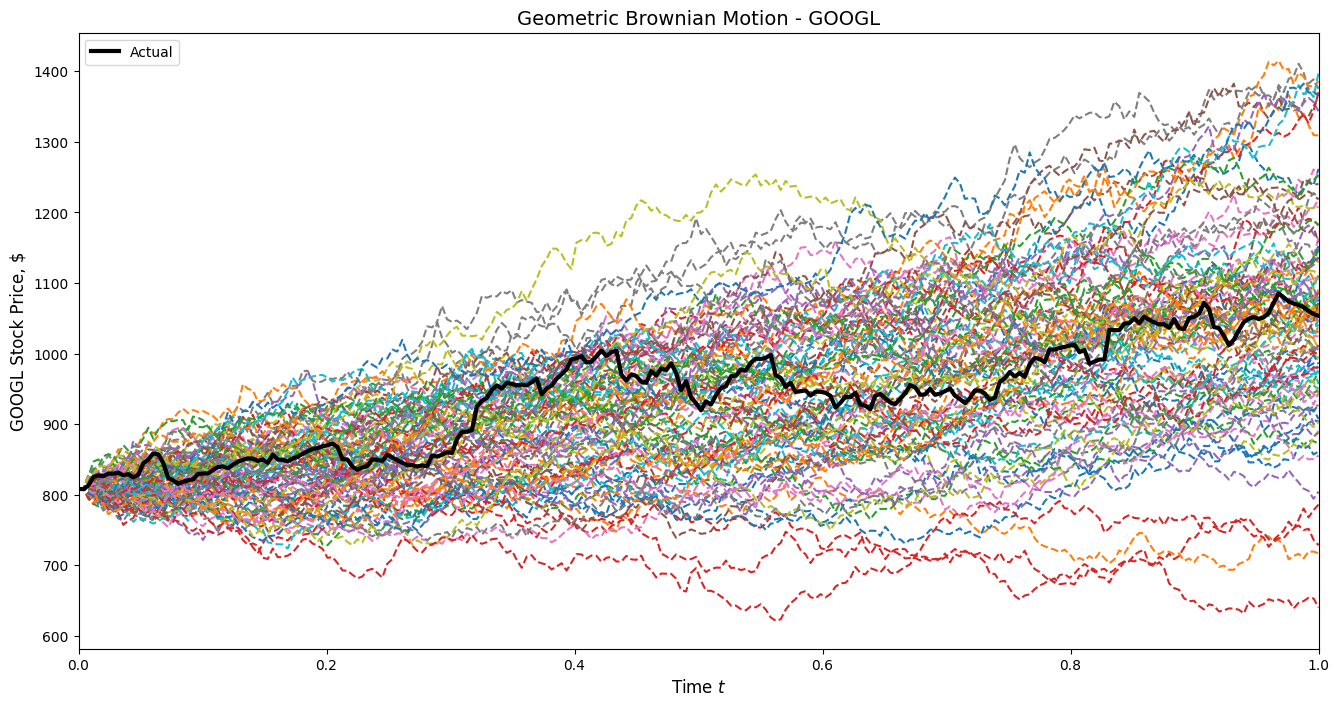

In [36]:
T=1.
N = 250
So = adj_reversed[0]

plt.figure(figsize = (16, 8))

for seed in range(1, 100):
    W = BrownianMotion(seed, N)
    solution = GBM_Exact(So, mu, sig, W, N, t)
    plt.plot(t, solution, ls='--')

plt.plot(t, adj_reversed, label = 'Actual', color = "black", linewidth = 3)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()

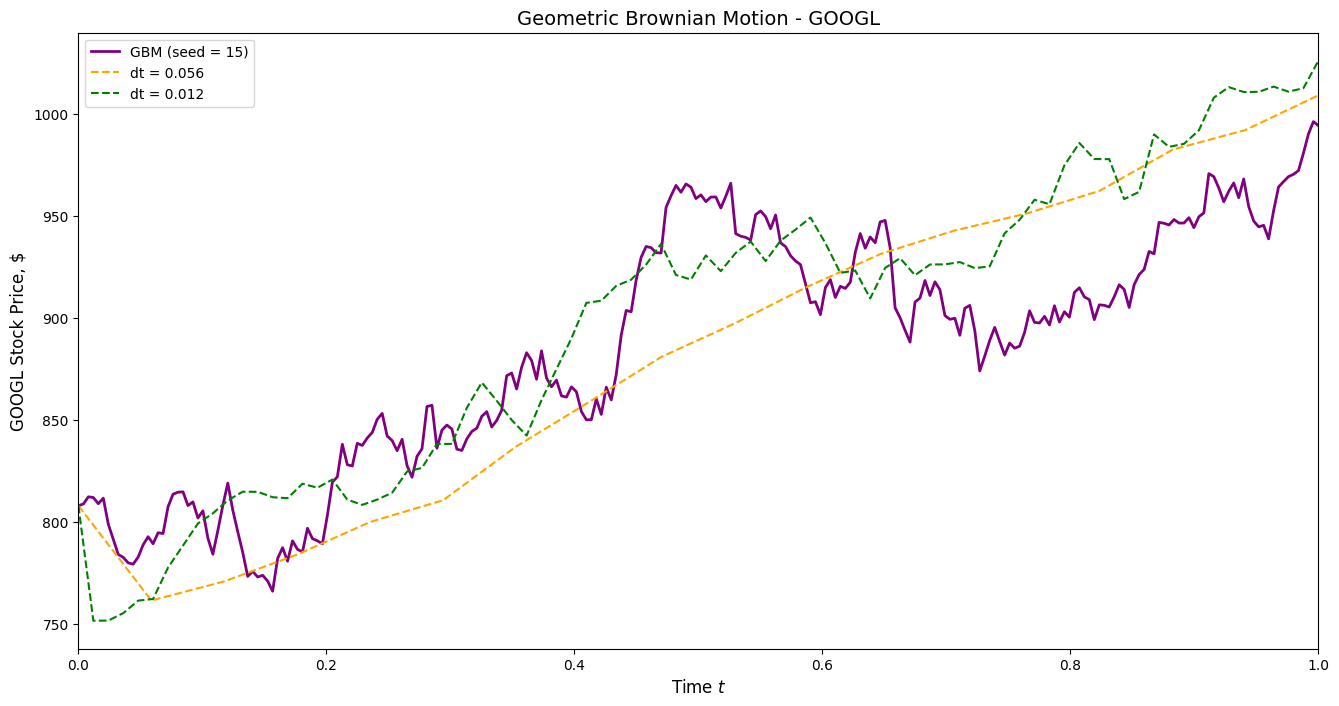

In [37]:
# 4.2 Euler-Maruyama Model


# Parameters:
# So - initial stock price
# mu - annualized mean of returns
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals
# TS - time step


#GBM - GOOGL
T=1.
N = 250
So = adj_reversed[0]  #adj. close price of GOOGL as of January 3rd, 2017

seed = 15
W = BrownianMotion(seed, N)
solution = GBM_Exact(So, mu, sig, W, N, t)  #exact solution
t = np.linspace(0., 1., N)    #time increments

plt.figure(figsize = (16, 8))

plt.plot(t, solution, label = 'GBM (seed = 15)', color = "purple", linewidth = 2)



#Euler Maruyama Approximation


def Em(So, mu, sigma, b, T, N, TS):
    dt = TS * (1./N)                            # EM step size
    L = N / TS                              # intervals according to the TS
    wi = []
    wi.append(So)
    for i in range (0, int(L)):
        delta_Wi = b[i-1] - b[i]
        wi_new = wi[i] + mu * wi[i] * dt + sigma *wi[i] * delta_Wi
        wi.append(wi_new)
    return wi, dt




#Different time step sizes


b = BrownianMotion(seed, N)
TS = 14
L = N/TS
Approx_1 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_1 = np.linspace(0., 1., int(L+1))
dt_1 = Em(So, mu, sig, W, T, N, TS)[1] #0.056

b = BrownianMotion(seed, N)
TS = 3
L = N/TS
Approx_2 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_2 = np.linspace(0., 1., int(L+1))
dt_2 = Em(So, mu, sig, W, T, N, TS)[1] #0.012

plt.plot(time_Em_1, Approx_1, label = 'dt = 0.056', color = "orange", ls = '--')
plt.plot(time_Em_2, Approx_2, label = 'dt = 0.012', color = "green", ls = '--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()


Footnotes
** *: ** SDEs

1. Stock Definition: Investopedia

2. EMS: TheBalance.com

**3. **Adj. Close: - The closing price of a stock is the price of that stock at the close of the trading day. The adjusted closing price is a more complex analysis that uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings to determine a value. The adjusted closing price represents a more accurate reflection of a stock's value, since distributions and new offerings can alter the closing price.

4. Dmouj, Abdelmoula; "Stock price modelling: Theory and Practice", 2.4 Random Walk, pg. 10, Vrije Universiteit, Faculty of sciences Amsterdam, The Netherlands

5. Wiener process: Wikipedia

6. a.s.: An event happens almost surely if it happens with probability one. In other words, the set of possible exceptions may be non-empty, but it has probability zero.

7. Itô calculus: Wikipedia

8. Euler-Maruyama method: Dunbar, Steven R.;Stochastic Processes and Advanced Mathematical Finance, University of Nebraska-Lincoln

9. Overfitting: Investopedia